In [48]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import math


In [19]:
# reading the data and looking at the first five rows of the data
#data=pd.read_csv("Wholesale customers data.csv")
#data.head()

#import para selecionar arquivo no computador
import io
data_file = pd.read_excel('idGabarito.xlsx',sheet_name = "Planilha identificadores ITSM")
df = data_file[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']]

In [21]:
# Load the train and test datasets to create two DataFrames

# train = pd.read_csv(io.BytesIO(uploaded['Identificadores.csv'])) 
# test = pd.read_csv(io.BytesIO(uploaded['Solicitante-X-Analista.csv'])) 

# reading the data and looking at the first five rows of the data
data = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']]
data.head(10)

,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
0,705,732
1,1851,1558
2,1417,1554
3,1609,723
4,1851,1555
5,1612,694
6,905,1554
7,673,732
8,1466,687
9,1609,1557


In [22]:
# statistics of the data
data.describe()

,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
count,67417.000000,67417.000000
mean,1330.632111,1190.576932
std,489.573536,415.792922
min,0.000000,19.000000
25%,905.000000,730.000000
50%,1466.000000,1554.000000
75%,1851.000000,1557.000000
max,1851.000000,1851.000000


In [23]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,6.741700e+04,6.741700e+04
mean,-6.839957e-15,6.446592e-15
std,1.000007e+00,1.000007e+00
min,-2.717961e+00,-2.817714e+00
25%,-8.694001e-01,-1.107716e+00
50%,2.765037e-01,8.740547e-01
75%,1.062908e+00,8.812699e-01
max,1.062908e+00,1.588358e+00


In [24]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
# inertia on the fitted data
kmeans.inertia_

66001.67835197861

Text(0, 0.5, 'Inertia')

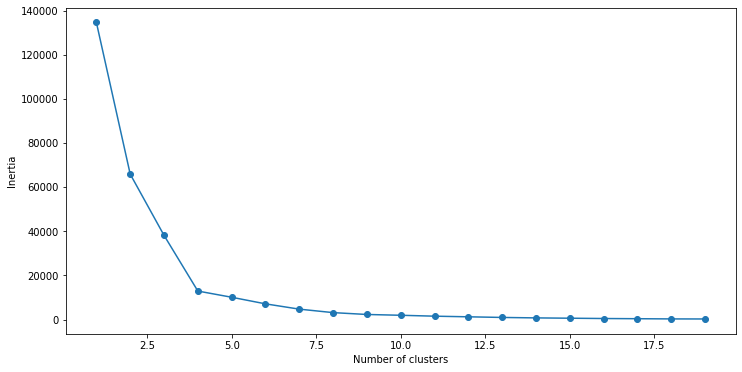

In [26]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [32]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 8, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [33]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    14607
0    13234
4    10662
1     9250
6     9247
3     7881
5     2014
7      522
Name: cluster, dtype: int64

Text(0, 0.5, 'Inertia')

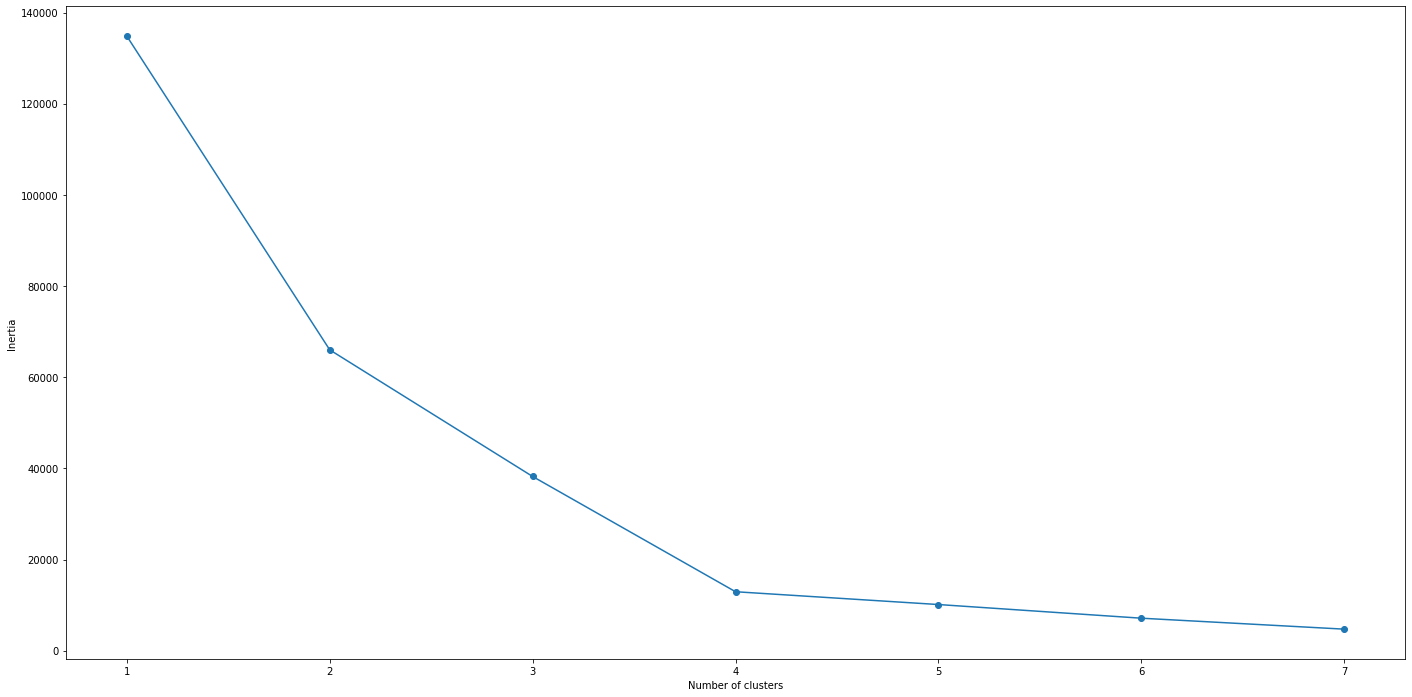

In [31]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,63):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,63), 'SSE':SSE})
plt.figure(figsize=(24,12))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [65]:
def calculate_wcss(data):
    wcss = []
    for n in range(1,64):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

In [66]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 64, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [67]:
# calculando a soma dos quadrados para as 63 quantidade de clusters
sum_of_squares = calculate_wcss(df)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df)

In [72]:
n

8

In [69]:
sum_of_squares

[27813549508.851063,
 15430708245.362446,
 7601832663.733763,
 3045576262.692145,
 2177941452.9503846,
 1581906025.4988885,
 986069881.9890088,
 700195534.7504089,
 499205384.1587145,
 413258486.4930583,
 342306077.95018303,
 282570344.79378086,
 213282005.1363023,
 155525932.18824527,
 120326393.72962452,
 97933359.48781428,
 76523557.08451779,
 60343800.873821706,
 56063343.64840223,
 51948633.40117636,
 45076582.867337644,
 41340891.05541732,
 39906623.409139246,
 36885362.238557264,
 33858369.69664711,
 30969303.082594357,
 29252528.825173624,
 28566809.002904955,
 24947163.931042057,
 23667097.29755286,
 22213962.762605377,
 20790467.342018608,
 19217105.860159945,
 18887151.510851882,
 16438980.423388632,
 15883957.288438696,
 14902646.823648447,
 13649063.456529617,
 13006479.879979592,
 11441930.902568493,
 11434578.746833352,
 10378309.051657865,
 9708211.204475256,
 9325490.479681756,
 9096880.634331185,
 8392865.630591536,
 7883362.40984884,
 7233103.564353667,
 6914791.0598

In [75]:
clusters

array([2, 4, 1, ..., 4, 2, 2])